<a href="https://colab.research.google.com/github/Ahmad-abdulrahim/Personalized-Job-Matching-System/blob/Development/PJMS_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUME PARSING**

**Import necessary libraries**

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computations
import re           # For regular expressions
import nltk         # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords   # Stopwords
from nltk.tokenize import word_tokenize  # Tokenization
from nltk.stem import WordNetLemmatizer  # Lemmatization
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


**Generate Sample Resume **

In [ ]:
def generate_resume():
    resume = """
Name: John Doe
Email: john.doe@example.com
Phone: 123-456-7890
LinkedIn: linkedin.com/in/johndoe
GitHub: github.com/johndoe

Objective:
Motivated software engineer with 5 years of experience in developing scalable web applications using Python and JavaScript. Seeking to leverage programming skills and collaborative work ethic to deliver high-quality solutions at Company XYZ.

Work Experience:
Software Engineer, Tech Solutions Inc., New York, NY
June 2018 - Present
- Developed and maintained high-traffic web applications using Python, Django, and JavaScript.
- Led the migration of legacy systems to microservices architecture, resulting in a 20% increase in performance.
- Collaborated with cross-functional teams to define and implement new features based on customer feedback.

Junior Software Developer, Web Innovations LLC, Boston, MA
July 2015 - May 2018
- Assisted in the development of e-commerce sites, focusing on backend functionalities with Python and Flask.
- Contributed to the development of an internal project management tool that improved team productivity by 30%.

Education:
Bachelor of Science in Computer Science
University of Technology, Boston, MA
September 2011 - May 2015
- Graduated with Honors
- Relevant Coursework: Data Structures and Algorithms, Web Development, Database Management

Skills:
- Programming Languages: Python, JavaScript, Java
- Frameworks/Technologies: Django, Flask, React, Node.js, Docker
- Tools: Git, Jenkins, JIRA, AWS
- Strong problem-solving skills and ability to work in fast-paced environments

Certifications:
- AWS Certified Solutions Architect - Associate
- Certified ScrumMaster (CSM)

References available upon request.
    """
    return resume

# Generate and print the resume
resume_text = generate_resume()
print(resume_text)

# Optional: Save the resume to a text file
with open("generated_resume.txt", "w") as file:
    file.write(resume_text)


Name: John Doe
Email: john.doe@example.com
Phone: 123-456-7890
LinkedIn: linkedin.com/in/johndoe
GitHub: github.com/johndoe

Objective:
Motivated software engineer with 5 years of experience in developing scalable web applications using Python and JavaScript. Seeking to leverage programming skills and collaborative work ethic to deliver high-quality solutions at Company XYZ.

Work Experience:
Software Engineer, Tech Solutions Inc., New York, NY
June 2018 - Present
- Developed and maintained high-traffic web applications using Python, Django, and JavaScript.
- Led the migration of legacy systems to microservices architecture, resulting in a 20% increase in performance.
- Collaborated with cross-functional teams to define and implement new features based on customer feedback.

Junior Software Developer, Web Innovations LLC, Boston, MA
July 2015 - May 2018
- Assisted in the development of e-commerce sites, focusing on backend functionalities with Python and Flask.
- Contributed to the de

**Insert file path**

In [ ]:
filed=input()

/content/generated_resume.txt


Extract Name, Email, Skills,number
We can delete after decide

In [ ]:
def extract_name_from_resume(text):
    name = None

    # Use regex pattern to find a potential name
    name_pattern = r"Name: (\b[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*)"
    name_match = re.search(name_pattern, text)
    if name_match:
        name = name_match.group(1)  # Group 1 contains the matched name

    return name

def extract_email_from_resume(text):
    email = None

    # Use regex pattern to find a potential email address
    email_pattern = r"Email:\s+(\S+@\S+)"
    email_match = re.search(email_pattern, text)
    if email_match:
        email = email_match.group(1)

    return email

def extract_contact_number_from_resume(text):
    contact_number = None

    # Use regex pattern to find a potential contact number
    pattern = r"\b(?:\+?\d{1,3}[-.\s]?)?\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}\b"
    match = re.search(pattern, text)
    if match:
        contact_number = match.group()

    return contact_number

def extract_skills_from_resume(text, skills_list):
    skills = []

    # Search for skills in the resume text
    for skill in skills_list:
        pattern = r"\b{}\b".format(re.escape(skill))
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            skills.append(skill)

    return skills

if __name__ == '__main__':
    text = generate_resume()  # Use the generated resume text
    name = extract_name_from_resume(text)
    email = extract_email_from_resume(text)
    contact_number = extract_contact_number_from_resume(text)


    if name:
        print("Name:", name)
    else:
        print("Name not found")

    if email:
        print("Email:", email)
    else:
        print("Email not found")

    if contact_number:
        print("Contact Number:", contact_number)
    else:
        print("Contact Number not found")

 # List of predefined skills
    # skills_list = ['Python', 'Data Analysis', 'Machine Learning', 'Communication', 'Project Management', 'Deep Learning', 'SQL', 'Tableau']

    # extracted_skills = extract_skills_from_resume(text, skills_list)

    # if extracted_skills:
    #     print("Skills:", extracted_skills)
    # else:
    #     print("No skills found")


Name: John Doe
Email
Email: john.doe@example.com
Contact Number: 123-456-7890


**Extract relevant Skills**

In [ ]:
def extract_skills_from_resume(text):
    # Regular expression pattern to match potential skills
    skill_pattern = r'\b[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\b'  # Matches capitalized words (potential skills)

    # Find all potential skills using the pattern
    extracted_skills = re.findall(skill_pattern, text)

    # Remove duplicates and return the unique set of extracted skills
    return list(set(extracted_skills))

if __name__ == '__main__':
    text = generate_resume()  # Use the generated resume text

    extracted_skills = extract_skills_from_resume(text)

    if extracted_skills:
        print("Skills:", extracted_skills)
    else:
        print("No skills found")


Skills: ['Docker', 'Strong', 'Certifications', 'Developed', 'Assisted', 'September', 'Relevant Coursework', 'Objective', 'Python', 'Tech Solutions Inc', 'May', 'Name', 'React', 'Git', 'References', 'Boston', 'Technologies', 'Software Engineer', 'John Doe\nEmail', 'Science', 'Database Management\n\nSkills', 'Collaborated', 'Junior Software Developer', 'Jenkins', 'Certified Solutions Architect', 'Phone', 'Contributed', 'Algorithms', 'Bachelor', 'Programming Languages', 'Led', 'New York', 'Motivated', 'June', 'Java', 'Technology', 'Computer Science\nUniversity', 'July', 'Django', 'Company', 'Work Experience', 'Web Development', 'Web Innovations', 'Node', 'Graduated', 'Frameworks', 'Education', 'Data Structures', 'Flask', 'Seeking', 'Tools', 'Honors', 'Present', 'Associate', 'Certified']


**Extract Education**

In [ ]:
def extract_education_from_resume(text):
    education = []

    # Use regex pattern to find education information
    pattern = r"(?i)(?:(?:Bachelor|B\.S\.|B\.A\.|Master|M\.S\.|M\.A\.|Ph\.D\.)\s(?:[A-Za-z]+\s)*[A-Za-z]+)"
    matches = re.findall(pattern, text)
    for match in matches:
        education.append(match.strip())

    return education

if __name__ == '__main__':
    text = generate_resume()

    extracted_education = extract_education_from_resume(text)
    if extracted_education:
        print("Education:", extracted_education)
    else:
        print("No education information found")

Education: ['Bachelor of Science in Computer Science\nUniversity of Technology']


**Extract University, College**

In [ ]:
def extract_institution_name(text):
    lines = text.split('\n')
    institution_pattern = r"(?i).*\b(college|university)\b.*"

    for line in lines:
        if re.match(institution_pattern, line):
            return line.strip()
    return None

# Example usage:
if __name__ == '__main__':
    text = generate_resume()

    institution_name = extract_institution_name(text)
    if institution_name:
         print("Institution:", institution_name)
    else:
         print("Institution name not found.")


Institution: University of Technology, Boston, MA


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_it_education(text):
    doc = nlp(text)

    education = []

    # Define keywords related to IT education
    it_keywords = {'Computer Science', 'IT', 'Software', 'Developer', 'Java', 'Python'}

    for ent in doc.ents:
        if any(keyword.lower() in ent.text.lower() for keyword in it_keywords):
            education.append(ent.text)

    return education

if __name__ == '__main__':
    text = generate_resume()

    extracted_education = extract_it_education(text)
    if extracted_education:
        print("IT Education:", extracted_education)
    else:
        print("No IT education found")


IT Education: ['GitHub', 'JavaScript', 'Software Engineer', 'Python, Django', 'JavaScript', 'Bachelor of Science in Computer Science\nUniversity of Technology', 'Algorithms', 'JavaScript', 'Java\n- Frameworks/Technologies', 'Git']


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_work_experience(text):
    doc = nlp(text)

    work_experience = []

    # Define keywords related to IT education
    work_ex_keywords = {'Data Analyst', 'Software Developer','Software Engineer','Developer', 'Java', 'Python','web applications', 'JavaScript'}

    for ent in doc.ents:
        if any(keyword.lower() in ent.text.lower() for keyword in work_ex_keywords):
            work_experience.append(ent.text)

    return work_experience

if __name__ == '__main__':
    text = generate_resume()

    extracted_work_experience = extract_work_experience(text)
    if extracted_work_experience:
        print("IT Work Experience:", extracted_work_experience)
    else:
        print("No IT related work experience found")


IT Work Experience: ['JavaScript', 'Software Engineer', 'Python, Django', 'JavaScript', 'JavaScript', 'Java\n- Frameworks/Technologies']


# **JOB POSTINGS DATASET EXPLORATION**

**Dataset information**

In [26]:
df = pd.read_csv("/content/Job Postings Dataset.csv")
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [27]:
df.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

In [28]:
df.shape

(19001, 24)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

Dataset Cleaning

In [30]:
# Dropping unnecessary columns from dataframe
df_clean = df.drop(columns=['date', 'AnnouncementCode',
                            'StartDate', 'ApplicationP',
                            'OpeningDate', 'Deadline',
                            'Notes', 'Attach', 'Year',
                            'Month', 'AboutC', 'jobpost',
                            'Term', 'Eligibility', 'Audience',
                            'Duration', 'Location', 'Salary'])

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           18973 non-null  object
 1   Company         18994 non-null  object
 2   JobDescription  15109 non-null  object
 3   JobRequirment   16479 non-null  object
 4   RequiredQual    18517 non-null  object
 5   IT              19001 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 760.9+ KB


In [32]:
df_clean.columns = df_clean.columns.str.strip()
df_clean.rename(columns={'RequiredQual': 'RequiredQualifications', 'JobRequirment': 'JobRequirement'}, inplace=True)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   18973 non-null  object
 1   Company                 18994 non-null  object
 2   JobDescription          15109 non-null  object
 3   JobRequirement          16479 non-null  object
 4   RequiredQualifications  18517 non-null  object
 5   IT                      19001 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 760.9+ KB


In [34]:
# List of columns to consider for dropping rows
columns_to_check = ['Title', 'Company', 'JobDescription', 'JobRequirement', 'RequiredQualifications']

# Drop rows with null values in the specified columns
df_clean.dropna(subset=columns_to_check, inplace=True)

# Reset index after dropping rows
df_clean.reset_index(drop=True, inplace=True)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13124 entries, 0 to 13123
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   13124 non-null  object
 1   Company                 13124 non-null  object
 2   JobDescription          13124 non-null  object
 3   JobRequirement          13124 non-null  object
 4   RequiredQualifications  13124 non-null  object
 5   IT                      13124 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 525.6+ KB


In [35]:
df_clean.head()

,Title,Company,JobDescription,JobRequirement,RequiredQualifications,IT
0,Chief Financial Officer,AMERIA Investment Consulting Company,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\r\nindivi...",False
1,Country Coordinator,Caucasus Environmental NGO Network (CENN),Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",False
2,BCC Specialist,Manoff Group,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",False
3,"Community Development, Capacity Building and C...",Food Security Regional Cooperation and Stabili...,Food Security Regional Cooperation and Stabili...,- Assist the Tavush Marz communities and commu...,- Higher Education and/or professional experie...,False
4,Country Economist (NOB),"United Nations Development Programme, Armenia",The United Nations Development Programme in Ar...,The incumbent under direct supervision of UNDP...,- Minimum Masters Degree in Economics;\r\n- Mi...,False


**Exploratory Data Analysis (EDA)**



Analysis of IT Jobs

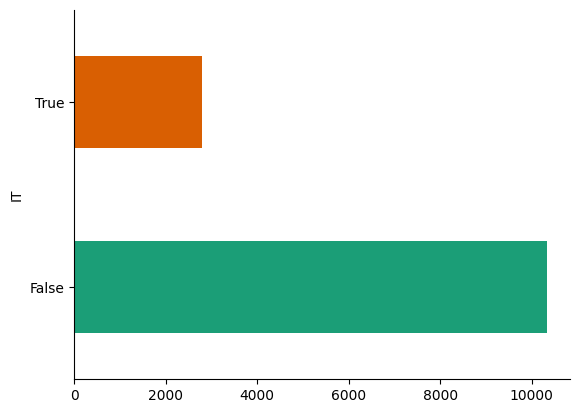

In [36]:
# @title IT

from matplotlib import pyplot as plt
import seaborn as sns
df_clean.groupby('IT').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
# Disable parser and NER for speed
#english text processing
nlp = spacy.load("en_core_web_sm")

In [38]:
def preprocess_text_spacy(text):
    """
    Advanced text preprocessing using spaCy.
    """
    # Initial cleaning (remove punctuation and numbers, optional)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    # Process text with spaCy
    doc = nlp(text)

    # Lemmatize and remove stopwords and punctuations
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Join processed tokens back into string
    return " ".join(tokens)

def preprocess_dataframe(df, text_columns):
    """
    Apply text preprocessing to specified text columns of a pandas DataFrame.
    """
    # Use .applymap() for elementwise operation if necessary
    for col in text_columns:
        df[col] = df[col].apply(preprocess_text_spacy)
    return df

In [39]:
text_columns = ['JobRequirement', 'JobDescription', 'RequiredQualifications', 'Title', 'Company']
df_cleaned = preprocess_dataframe(df_clean.copy(), text_columns)

In [40]:
df_cleaned.head()

,Title,Company,JobDescription,JobRequirement,RequiredQualifications,IT
0,chief financial officer,ameria investment consult company,ameria investment consult company seek chief f...,supervise financial management administrative ...,perform job successfully individual able perfo...,False
1,country coordinator,caucasus environmental ngo network cenn,public outreach strengthen grow network enviro...,work country director provide environmental in...,degree environmentally related field year rele...,False
2,bcc specialist,manoff group,lead local enhancement development health bcc ...,identify gap knowledge oversee information col...,advanced degree public health social science c...,False
3,community development capacity building conflict,food security regional cooperation stability p...,food security regional cooperation stability p...,assist tavush marz community community union d...,high education andor professional experience e...,False
4,country economist nob,united nations development programme armenia,united nations development programme armenia a...,incumbent direct supervision undp resident rep...,minimum master degree economic minimum year re...,False


In [41]:
df_cleaned[df_cleaned['IT'] == True]

,Title,Company,JobDescription,JobRequirement,RequiredQualifications,IT
6,graphic designer,xalt llc,position graphic designer gd demand prove succ...,graphic designer responsible graphical develop...,gd creative innovative great capacity implemen...,True
31,graphic designer,ameria cjsc,ameria cjsc seek qualified candidate position ...,design company production packaging preparatio...,professional background graphic design strong ...,True
42,software developer,synergy international system incarmenia,synergy international system incarmenia seek f...,specific task key responsibility include limit...,degree computer science information technology...,True
65,senior database administrator,synergy international systems inc,synergy international system incarmenia seek f...,specific task key responsibility include limit...,degree computer science information technology...,True
97,senior software developer position,zentexam,zentexam seek software developer fill position...,design develop implement test write documentat...,expect successful candidate able design develo...,True
...,...,...,...,...,...,...
13103,senior java software engineer,essential solution llc,role incumbent responsible high quality softwa...,responsible develop build high quality web app...,strong java skill excellence jee spring hibern...,True
13115,junior mobile visual ui ux designer,picsart llc,picsart look creative junior mobile visual ui ...,create visual language picsart user experience...,experience shipping beautifully design consume...,True
13116,javascript professional,berg development llc,berg development look javascript professional ...,redevelop development ambitious bc project coo...,expert knowledge javascript especially backbon...,True
13118,java developer,nasdaq omx armenia ojsc,nasdaq omx armenia seek energetic java develop...,responsible develop build highquality web appl...,master degree engineering relate technical fie...,True


 TF-IDF Vectorization

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenate text columns
df_cleaned['combined_text'] = df_cleaned['JobDescription'] + ' ' + df_cleaned['JobRequirement'] + ' ' + df_cleaned['RequiredQualifications']

# Apply TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1, 2))
tfidf_matrix = vectorizer.fit_transform(df_cleaned['combined_text'])

In [43]:
# Inspect top N terms by TF-IDF score
feature_names = vectorizer.get_feature_names_out()
top_n = 20
sorted_features = np.argsort(tfidf_matrix.toarray().sum(axis=0))[-top_n:]
print(np.array(feature_names)[sorted_features])

['service' 'sale' 'responsible' 'develop' 'management' 'excellent'
 'company' 'customer' 'software' 'design' 'team' 'language' 'good'
 'development' 'ability' 'project' 'experience' 'skill' 'work' 'knowledge']


For a job matching system where understanding the nuanced meaning of job descriptions and resumes is crucial, Word Embeddings or Doc2Vec could provide significant benefits over TF-IDF by capturing semantic similarities.

In [44]:
df_cleaned[['RequiredQualifications']].head()

,RequiredQualifications
0,perform job successfully individual able perfo...
1,degree environmentally related field year rele...
2,advanced degree public health social science c...
3,high education andor professional experience e...
4,minimum master degree economic minimum year re...


In [45]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-03-02 22:20:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-03-02 22:20:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-03-02 22:20:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [46]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models.keyedvectors import KeyedVectors

# Convert GloVe to Word2Vec format
glove_input_file = 'glove.6B.200d.txt'
word2vec_output_file = 'glove.6B.200d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the converted model
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-46-d28c250c4df9>:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [47]:
similar_words = model.most_similar('programming', topn=10)
print(similar_words)

[('programs', 0.6399011611938477), ('broadcast', 0.6367257833480835), ('broadcasts', 0.6275299787521362), ('network', 0.6140356063842773), ('channel', 0.6014938950538635), ('networks', 0.6003807187080383), ('channels', 0.5986186265945435), ('broadcasting', 0.5896220803260803), ('airs', 0.5892102718353271), ('format', 0.5845922827720642)]


In [48]:
# Vocabulary Overlap Check

glove_vocab = set(model.key_to_index.keys())

# Extract unique words from dataset
job_posts_words = set(" ".join(df_cleaned['combined_text']).split())
missing_words = job_posts_words - glove_vocab

# Percentage of words in dataset covered by GloVe model
coverage = len(job_posts_words - missing_words) / len(job_posts_words) * 100
print(f"Coverage: {coverage:.2f}%")
print(f"Number of missing words: {len(missing_words)}")

Coverage: 62.35%
Number of missing words: 7447


A coverage of 62.30% with 7,447 missing words from our job posts dataset in the GloVe vocabulary highlights a significant gap in the embeddings' ability to fully represent the specific terms used in our domain. This situation is not uncommon, especially for
specialized or technical domains where jargon, brand names, acronyms, and newer terms may not be included in general-purpose embeddings trained on broader corpora.

The following strategy can be implemented to address this gap:

1. Train Additional Embeddings: since we have substantial corpus of domain-specific text in our dataset, we can adjust our code so unknown words are replaced by a synonym, in hopes that will increase our word coverage of the glove model

In [49]:
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [50]:
def find_glove_synonym(word, glove_vocab):
    synonyms = set()
    for syn in wn.synsets(word):
        for lemma in syn.lemmas():
            if lemma.name() in glove_vocab:
                synonyms.add(lemma.name())
    return list(synonyms)[0] if synonyms else word

In [51]:
glove_vocab = set(model.key_to_index.keys())  # Adjust depending on how you've loaded your GloVe model

In [52]:
def subword_tokenization(word, glove_vocab):
    # Example: Simple subword tokenization by splitting the word in half
    subwords = [word[:len(word)//2], word[len(word)//2:]]
    for subword in subwords:
        if subword in glove_vocab:
            return subword
    return word  # Return the original word if no subwords are found in GloVe

In [53]:
def preprocess_jobpost(text, glove_vocab):
    words = text.split()
    processed_words = []
    for word in words:
        # First, try finding a synonym in GloVe
        synonym = find_glove_synonym(word, glove_vocab)
        # If the synonym is the same as the original word, try subword tokenization
        final_word = subword_tokenization(synonym, glove_vocab) if synonym == word else synonym
        processed_words.append(final_word)
    return ' '.join(processed_words)

df_cleaned['combined_text_synonyms'] = df_cleaned['combined_text'].apply(lambda x: preprocess_jobpost(x, glove_vocab))

In [54]:
# Vocabulary Overlap Check

glove_vocab = set(model.key_to_index.keys())

# Extract unique words from dataset
job_posts_words = set(" ".join(df_cleaned['combined_text_synonyms']).split())
missing_words = job_posts_words - glove_vocab

# Percentage of words in dataset covered by GloVe model
coverage = len(job_posts_words - missing_words) / len(job_posts_words) * 100
print(f"Coverage: {coverage:.2f}%")
print(f"Number of missing words: {len(missing_words)}")

Coverage: 74.31%
Number of missing words: 2829


In [58]:
df_cleaned.head()

,Title,Company,JobDescription,JobRequirement,RequiredQualifications,IT,combined_text,combined_text_synonyms
0,chief financial officer,ameria investment consult company,ameria investment consult company seek chief f...,supervise financial management administrative ...,perform job successfully individual able perfo...,False,ameria investment consult company seek chief f...,ame inves con troupe try foreman fiscal police...
1,country coordinator,caucasus environmental ngo network cenn,public outreach strengthen grow network enviro...,work country director provide environmental in...,degree environmentally related field year rele...,False,public outreach strengthen grow network enviro...,pub each fortify originate mesh enviro n busi ...
2,bcc specialist,manoff group,lead local enhancement development health bcc ...,identify gap knowledge oversee information col...,advanced degree public health social science c...,False,lead local enhancement development health bcc ...,trail lo cement exploitation wellness b specia...
3,community development capacity building conflict,food security regional cooperation stability p...,food security regional cooperation stability p...,assist tavush marz community community union d...,high education andor professional experience e...,False,food security regional cooperation stability p...,fo certificate regi coope stab broadcast so as...
4,country economist nob,united nations development programme armenia,united nations development programme armenia a...,incumbent direct supervision undp resident rep...,minimum master degree economic minimum year re...,False,united nations development programme armenia a...,merge state exploitation broadcast arm foretel...


In [55]:
!pip install gensim fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=41ad1306da155e9c06ac6afc5b667b9e4a61aac79ddd006167c2a8caae12b3e8
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
from gensim.models.fasttext import FastText as FT_gensim
ft_model = FT_gensim.load_fasttext_format('your_fasttext_model.bin')

# Resume cleaning- keep it or delete


In [ ]:
!pip install pymupdf

In [ ]:
from google.colab import files
import fitz  # PyMuPDF

uploaded = files.upload()

In [ ]:
text_data = []
for filename in uploaded.keys():
  with fitz.open(stream=uploaded[filename], filetype="pdf") as doc:
    text = ""
    for page in doc:
      text += page.get_text()
    text_data.append(text)

In [ ]:
df_resume = pd.DataFrame(text_data, columns=['ExtractedText'])

In [ ]:
df_resume

In [ ]:
# Initialize the lemmatizer, stemmer, and stopwords list
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_and_normalize_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove extra spaces and tabs
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize text
    words = word_tokenize(text)
    # Stem, normalize (lemmatize), and remove stop words
    filtered_words = [stemmer.stem(lemmatizer.lemmatize(word.lower())) for word in words if word.lower() not in stop_words]
    # Join words back to string
    clean_text = ' '.join(filtered_words)
    return clean_text

In [ ]:
# Assuming 'df' is your DataFrame and 'ExtractedText' is the column with original text
df_resume['ProcessedText'] = df_resume['ExtractedText'].apply(clean_and_normalize_text)

In [ ]:
df_resume

In [ ]:
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def normalize_and_remove_stopwords(text):
    # Tokenize text
    words = word_tokenize(text)
    # Normalize (lemmatize) and remove stop words
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    # Join words back to string
    text = ' '.join(filtered_words)
    return text

In [ ]:
df_resume['NormalizedText'] = df_resume['CleanedText'].apply(normalize_and_remove_stopwords)

In [ ]:
df_resume